In [334]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams['figure.figsize'] = (10,8)
from IPython.display import Audio
from scipy.io.wavfile import read

In [2]:
path = '/Users/chenzuyu/Documents/MPC/Audio'
import os 
for (root,dirs,files) in os.walk(path):
    print(f'there are {len(files)} files.') 
    data = []
    #print(type(files))
    for file in files:
        x, sr = librosa.load('Audio/' + file) #sr = 22050 by default
        data.append(x)
        
print('data_length:', len(data)) 

there are 6 files.
data_length: 6


In [258]:
files

['Taiwan_Male1.wav',
 'Mainland_Female1.wav',
 'Mainland_Female2.wav',
 'Taiwan_Female1.wav',
 'Mainland_Male1.wav',
 'Taiwan_Female2.wav']

In [3]:
#normalize audio 
def audioRange(x):
    avg = (x.max() + x.min())/2 #DC shift
    x = x - avg #cut out DC shift
    x = x/x.max() 
    return x
norm_data = [audioRange(d) for d in data] #A list contains all normalized audio files 

In [326]:
#hop_length = 110 corresponds to 5ms intervals at sr = 22050
mat = []
for i, d, f in zip(range(6), norm_data, files):  
    fre, mag = librosa.core.piptrack(d, hop_length=110, fmin=50, fmax=400)
    mask = (mag == mag.max(axis = 0)) & (mag != 0) 
    pitches = fre[mask]
    print(i, f, 'length:', mag.shape[1], '\n', 'average pitch: =', pitches.mean())
    mat.append(pitches)

0 Taiwan_Male1.wav length: 49354 
 average pitch: = 186.29607
1 Mainland_Female1.wav length: 50594 
 average pitch: = 247.14963
2 Mainland_Female2.wav length: 50861 
 average pitch: = 233.07771
3 Taiwan_Female1.wav length: 51704 
 average pitch: = 209.66562
4 Mainland_Male1.wav length: 56634 
 average pitch: = 229.88759
5 Taiwan_Female2.wav length: 52443 
 average pitch: = 207.57608


In [454]:
datasize = [49354, 50594, 50861, 51704, 56634, 52443]
avg_datasize = np.mean(datasize)
diff = np.abs(datasize - avg_datasize)
diff_percent = diff/avg_datasize
diff_percent.round(4).mean()

0.03345

In [355]:
Taiwan = [mat[3], mat[5], mat[0]]
Mainland = [mat[1], mat[2], mat[4]]
file_T = [files[3], files[5], files[0]]
file_M = [files[1], files[2], files[4]]

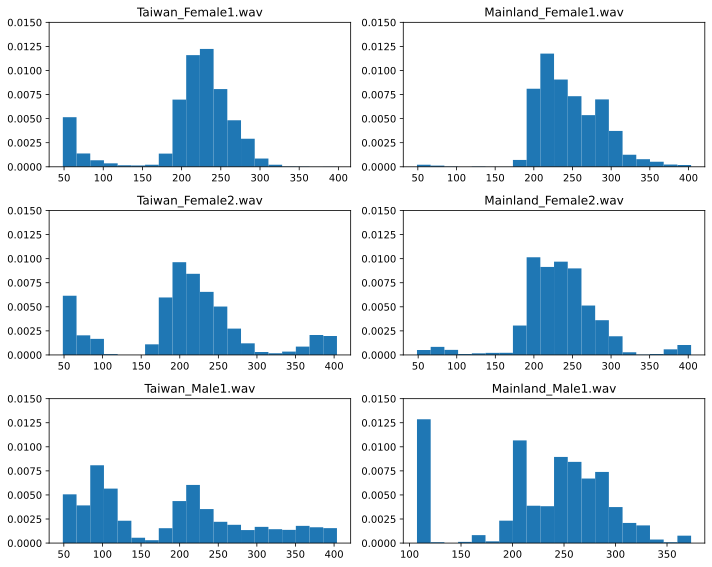

In [420]:
#plot a histogram of pitches 
fig, axs = plt.subplots(3, 2, figsize=(10,8))
for row in range(3):
    #plt.figure(figsize=(10, 10))
    axs[row, 0].hist(Taiwan[row], bins = 20, density = True)
    axs[row, 0].set(title = file_T[row], ylim = (0,0.015))
    axs[row, 1].hist(Mainland[row], bins = 20, density = True)
    axs[row, 1].set(title = file_M[row], ylim = (0,0.015))
plt.tight_layout()
plt.savefig('figure1.png')

In [370]:
Tf = np.concatenate((mat[3],mat[5]))
Mf = np.concatenate((mat[1],mat[2]))
Tm = mat[0]
Mm = mat[4]
files = ['Taiwan_female', 'Mainland_female','Taiwan_male', 'Mainland_male' ]

In [488]:
print(np.var(Tf), np.var(Mf), np.var(Tm), np.var(Mm)) #number of samples = (2,2,1,1)
print(np.var(np.concatenate([Tf, Mf])))  #number of samples = 2+2=4
print(np.var(np.concatenate([Tm, Mm])))  #number of samples = 1+1=2

variances = [np.var(Tf), np.var(Mf), np.var(Tm), np.var(Mm), 
            np.var(np.concatenate([Tf, Mf])),np.var(np.concatenate([Tm, Mm]))]
print(Tf.mean(), Mf.mean(), Tm.mean(), Mm.mean(), 
        np.mean(np.concatenate([Tf, Mf])), np.mean(np.concatenate([Tf, Mm])))
means = [Tf.mean(), Mf.mean(), Tm.mean(), Mm.mean(), 
        np.mean(np.concatenate([Tf, Mf])), np.mean(np.concatenate([Tf, Mm]))]
num_samples = [2,2,1,1,4,2]
import pandas as pd
pd.DataFrame(np.array([variances, means,num_samples]), 
             columns = ['TaiwanFemale', 'MainlandFemale', 'TaiwanMale','MainlandMale', 'Female', 'Male'],
            index = ['variance', 'mean', 'number of samples']).round()

5422.065 2293.7852 9924.594 3986.7012
4166.712
8804.473
208.72871 239.59425 186.29607 229.88759 223.45987 212.3446


TaiwanFemale  MainlandFemale  TaiwanMale  MainlandMale  \
variance                 5422.0          2294.0      9925.0        3987.0   
mean                      209.0           240.0       186.0         230.0   
number of samples           2.0             2.0         1.0           1.0   

                   Female    Male  
variance           4167.0  8804.0  
mean                223.0   212.0  
number of samples     4.0     2.0

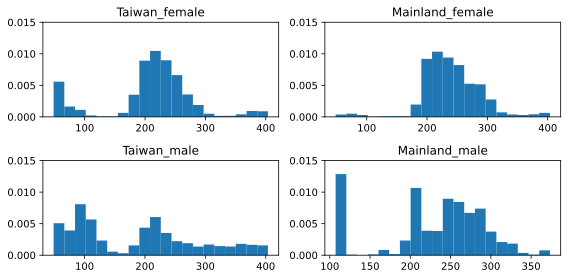

In [423]:
#Average pitch density graph:
fig, axs = plt.subplots(2, 2, figsize=(8,4))
axs[0, 0].hist(Tf, bins = 20, density = True)
axs[0, 0].set(title = 'Taiwan_female', ylim = (0,0.015))
axs[0, 1].hist(Mf, bins = 20, density = True)
axs[0, 1].set(title = 'Mainland_female', ylim = (0,0.015))
axs[1, 0].hist(Tm, bins = 20, density = True)
axs[1, 0].set(title = 'Taiwan_male', ylim = (0,0.015))
axs[1, 1].hist(Mm, bins = 20, density = True)
axs[1, 1].set(title = 'Mainland_male', ylim = (0,0.015))
plt.tight_layout()
plt.savefig('figure2.png')

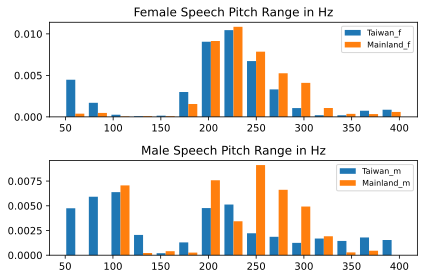

In [424]:
plt.figure(figsize=(6, 4))
plt.subplot(2,1,1)
plt.hist((Tf, Mf), bins = 15, density = True, label = ['Taiwan_f', 'Mainland_f'])
plt.legend(prop={'size': 8})
plt.title('Female Speech Pitch Range in Hz')
plt.subplot(2,1,2)
plt.hist((Tm, Mm), bins = 15, density = True, label = ['Taiwan_m', 'Mainland_m'])
plt.title('Male Speech Pitch Range in Hz')
plt.legend(prop={'size': 8})
plt.tight_layout()
plt.savefig('figure3.png')